# Boosting Yöntemlerini ve Adaboost'u öğrenelim

## Boosting Yöntemlerine Giriş

Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır. (Kearns ve Valiant 1990) Bu teorik fikrin hayata geçirilmesi Adaboost ile oluyor.

## Adaptive Boosting (AdaBoost)

Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır. (Schapires ve Freund 1996-1999)

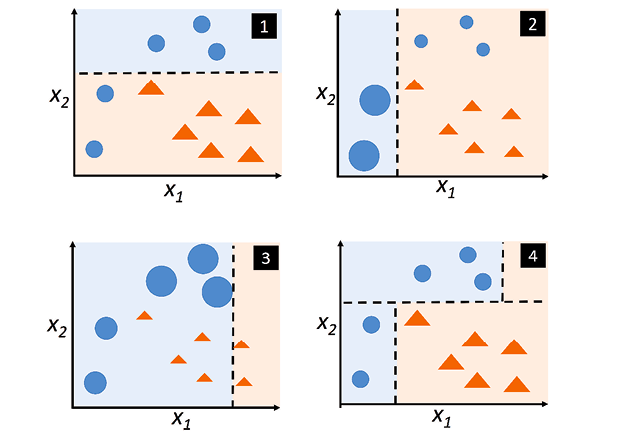

bu bir sınıflandırma problemidir. box1'de sınıflar mavi ve kırmızı olarak 2'ye ayrılır. ayrılma işleminden sonra mavilerin yanlış sınıflandırıldığı görülüyor. box2'de kümülatif olarak yanlış sınıflandırılan mavilere odaklanarak sınıflandırma işlemi tekrar gerçekleştirilir. box3'de kırmızılar yanlış sınıflandırılmıştır. bu işlemler devam ettirildiğinde son iterasyonda doğru sınıflandırılma gerçekleştirilir.

Adaboost başka problemlere entegre edilemez sadece bir sınıflandırma yapısı için kullanılır.

# Gradient Boosting Machines

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. (2001 Friedman)

Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

GBM bir teorik framework'tür. Adaboost'tan, CART'dan ve Random Forests'dan bazı özellikler aldı. en optimum model haline gelmiş oldu. ağaca dayalı yöntemlerin teorik framework'ü olarak düşünülüyor.

Brimen, "boosting'in bir optimizasyon problemi olarak görülebileceğini ifade ediyor. (1997)

bu fikrin üstüne Friedman bir temel inşa ediyor. GBM algoritması ortaya çıkar.

Boosting bir optimizasyon algoritması haline gelir.

* Gradient bootsting tek bir tahminsel model formunda olan modeller serisi oluşturur.
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur.
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmakta.
* GB birçok temel öğrenici tipi (base learner type) kullanabilir.(Trees, linear terms, splines,...)
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient Descent

* Bagging ve boosting metodolojidir.
* Bagging birbirinden bağımsız ağaçalar oluşturur. random forests temelini bunun üzerine oturtmuştur. birbirinden bağımsız ağaçlar rassallık sağlanmıştır.
* Gradient bootsting tek bir tahminsel model formunda olan modeller serisi oluşturur. ve bu modeller birbirine bağımlı. bagging'de bağımsız, boosting'de bağımlı bir yapı söz konusu

# Gradient Boosting Machines - Model & Tahmin

In [15]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

In [1]:
import pandas as pd
# veri setimizi import edelim
diabetes = pd.read_csv("diabetes.csv")

In [2]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                   random_state=42)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# modeli kurdum
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [6]:
# y test tahmin değerleri
y_pred = gbm_model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
# doğruluk oranı
accuracy_score(y_test, y_pred)

0.7489177489177489

# GBM - Model Tuning

In [8]:
gbm_model

GradientBoostingClassifier()

In [9]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        /opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning r

* learning_rate: her ağacın katkısını `learning_rate` kadar küçültür. learning_rate ve n_estimators arasında bir denge vardır.

In [10]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100, 500, 1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [11]:
gbm = GradientBoostingClassifier()

In [12]:
from sklearn.model_selection import GridSearchCV
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [13]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

Bu kod, bir Python programının bir parçasıdır ve Gradient Boosting Machine (GBM) adlı bir sınıflandırma modelini eğitmek ve en iyi hiperparametreleri bulmak için kullanılmaktadır. Ayrıntıları aşağıda açıklanmıştır:

1. İlk olarak, bir dizi hiperparametre kombinasyonunu araştırmak için kullanılacak olan `gbm_params` adlı bir sözlük oluşturuluyor. Bu sözlük, GradientBoostingClassifier modelinin hiperparametrelerinin farklı değerlerini denemek için kullanılacak. `learning_rate`, `n_estimators`, `max_depth`, ve `min_samples_split` gibi parametreler bu sözlüğün anahtarlarıdır.

2. `gbm` adlı bir GradientBoostingClassifier nesnesi oluşturuluyor. Bu, gradient boosting algoritmasını kullanarak bir sınıflandırma modelini temsil eder.

3. Ardından, GridSearchCV adlı bir çapraz doğrulama (cross-validation) nesnesi olan `gbm_cv` oluşturuluyor. GridSearchCV, verilerinizi otomatik olarak çapraz doğrulama ile bölen ve belirtilen hiperparametre kombinasyonlarını kullanarak modelinizi eğiten bir yapıdır. İşte bu nesnenin bazı önemli parametreleri:

   - `gbm`: Bu, eğitilecek modeli temsil eder. Yukarıda oluşturduğumuz `gbm` nesnesini kullanıyoruz.
   - `gbm_params`: Araştırılacak hiperparametre kombinasyonlarını içeren sözlük.
   - `cv`: Çapraz doğrulama kat sayısı. Burada 10 katlı çapraz doğrulama kullanılıyor, yani veri 10 eşit parçaya bölünüp her seferinde bir parça test verisi olarak kullanılırken, diğer 9 parça eğitim verisi olarak kullanılacak.
   - `n_jobs`: Eğitim işlemlerini paralelleştirmek için kullanılan işlem sayısı. `-1` bu işlemi tüm kullanılabilir işlemcileri kullanarak yapmayı ifade eder.
   - `verbose`: Çalışma sırasında çıktının ne kadar ayrıntılı olacağını belirler. Burada `2` seviyesi daha fazla bilgi sağlar.

`learning_rate` hiperparametresi, gradient boosting algoritmasının bir öğrenme oranıdır. Bu öğrenme oranı, her ağaç eklenmeden önce mevcut tahminlere ne kadar büyük bir katkı yapılacağını kontrol eder. Düşük bir öğrenme oranı (örneğin, 0.001), modelin daha yavaş öğrenmesini ve daha istikrarlı bir şekilde yaklaşmasını sağlar, ancak daha fazla ağacın eklenmesi gerekebilir. Yüksek bir öğrenme oranı (örneğin, 0.1), modelin daha hızlı öğrenmesini sağlar, ancak aşırı uydurmanın riskini artırabilir. Bu nedenle, `learning_rate` parametresini dikkatlice seçmek önemlidir ve bu nedenle bu parametre farklı değerlerle denenecektir. GridSearchCV, en iyi `learning_rate` değerini seçmek için çapraz doğrulama sonuçlarına dayalı olarak otomatik olarak yapacaktır.

In [14]:
print("En iyi Parametreler: " + str(gbm_cv.best_params_))

En iyi Parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [15]:
# final model nesnesini oluşturdum
gbm = GradientBoostingClassifier(learning_rate=0.01,
                                 max_depth=3,
                                 min_samples_split=5,
                                 n_estimators=500)

In [16]:
# final modelini kurdum
gbm_tuned = gbm.fit(X_train, y_train)

In [17]:
# y test tahmini değerleri
y_pred=gbm_tuned.predict(X_test)

In [18]:
# doğruluk oranı
accuracy_score(y_test, y_pred)

0.7489177489177489

Çıkan doğruluk oranlarına bakıldığında en yüksek Random forests'dır. Bu veri seti özelinde en iyisi Random Forests gözüküyor.